In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [40]:
w = np.array([0, 0, 1]).reshape(-1, 1)
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 1, 2]).reshape(-1, 1)
n = 4
phi = np.array([x*x, x, np.ones_like(x)]).T
alpha = 0.01
sigma = 0.2

In [41]:
d_f = (2/n)*phi.T.dot(phi.dot(w) - y) + sigma*np.sign(w)
w = w - alpha*d_f
w

array([[0.045],
       [0.015],
       [0.998]])

In [42]:
w = np.array([0, 0, 1]).reshape(-1, 1)
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 1, 2]).reshape(-1, 1)
n = 4
alpha = 0.01
sigma = 0.2

In [43]:
z = np.arange(0,3,0.2)
phi = np.array([x*x, x, np.ones_like(x)]).T

In [44]:
loss = []
for i in range(200):
    d_f = (2/n)*phi.T.dot(phi.dot(w) - y) + sigma*np.sign(w)
    w = w - alpha*d_f
    y_hat = phi.dot(w)
    err = (y - y_hat).T.dot(y - y_hat)/n
    loss.append(err.item())

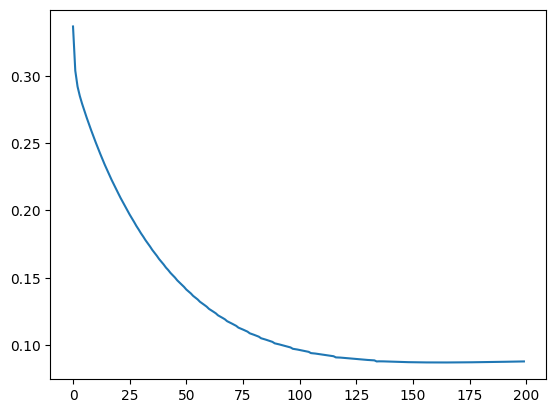

In [45]:
plt.plot(loss)
plt.show()

In [47]:
stock_data = np.genfromtxt('Data/stock_prediction_data_scaled.csv', delimiter=',')
stock_data

array([[ 0.039, -1.214, -0.715, ...,  0.953, -1.22 , -1.263],
       [ 0.281, -1.47 ,  0.499, ..., -0.344, -0.809, -0.841],
       [ 1.346, -0.352,  0.968, ...,  0.612, -0.559,  0.454],
       ...,
       [ 0.633,  1.083,  1.284, ...,  0.093, -0.7  , -0.675],
       [ 0.225, -0.98 , -0.138, ..., -0.542, -0.826, -1.639],
       [-0.189, -1.156,  0.526, ...,  0.612,  1.375, -1.432]])

In [48]:
stock_price = np.genfromtxt('Data/stock_price.csv', delimiter=',').reshape(-1, 1)
stock_price

array([[-3.100e-01],
       [-1.686e+01],
       [ 1.360e+00],
       [ 1.275e+01],
       [ 7.910e+00],
       [-2.750e+00],
       [-5.400e-01],
       [-1.151e+01],
       [-4.010e+00],
       [ 3.080e+00],
       [-8.230e+00],
       [-1.400e-01],
       [ 2.560e+00],
       [-6.870e+00],
       [ 4.430e+00],
       [ 1.980e+00],
       [ 3.760e+00],
       [ 4.160e+00],
       [ 6.670e+00],
       [-7.210e+00],
       [ 3.220e+00],
       [ 1.100e+01],
       [-2.150e+00],
       [ 6.330e+00],
       [-4.350e+00],
       [ 1.300e-01],
       [ 7.070e+00],
       [ 6.390e+00],
       [-3.050e+00],
       [ 4.670e+00],
       [-1.092e+01],
       [-4.370e+00],
       [-3.800e+00],
       [ 6.360e+00],
       [ 5.580e+00],
       [-4.720e+00],
       [-3.620e+00],
       [-8.660e+00],
       [ 8.970e+00],
       [ 4.800e+00],
       [ 6.470e+00],
       [ 3.380e+00],
       [-1.280e+00],
       [-1.309e+01],
       [-1.160e+01],
       [ 8.790e+00],
       [ 4.910e+00],
       [ 1.57

In [51]:
X_train, X_rest, y_train, y_rest = train_test_split(stock_data, stock_price, test_size=0.2)
X_test, X_validation, y_test, y_validation = train_test_split(X_rest, y_rest, test_size=0.5)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)